In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import geopandas as gpd
from datetime import datetime





In [26]:
#fire_n = pd.read_csv("fire_archive_M-C61_414680.csv")

fire_n = pd.read_csv("FireMt.K.csv")

In [27]:
fire_n.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-0.1280,37.4616,339.6,3.9,1.8,9/13/2001,843,Terra,MODIS,90,6.03,289.6,295.5,D,0
1,-0.1350,37.4570,316.7,3.9,1.8,9/13/2001,843,Terra,MODIS,59,6.03,288.6,94.3,D,0
2,-0.1223,37.4599,310.4,4.8,2.0,10/20/2001,722,Terra,MODIS,12,6.03,299.7,73.4,D,0
3,-0.0204,37.4320,330.1,1.1,1.0,2/3/2002,756,Terra,MODIS,66,6.03,307.9,19.5,D,0
4,-0.0034,37.4437,324.8,1.1,1.0,2/3/2002,756,Terra,MODIS,44,6.03,303.9,16.0,D,0


In [28]:

fire_n['acq_date'] = pd.to_datetime(fire_n['acq_date'])


fire_n['YEAR'] = fire_n['acq_date'].dt.year
fire_n['month'] = fire_n['acq_date'].dt.month
fire_n['day'] = fire_n['acq_date'].dt.day

fire_n.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,YEAR,month,day
0,-0.1280,37.4616,339.6,3.9,1.8,2001-09-13,843,Terra,MODIS,90,6.03,289.6,295.5,D,0,2001,9,13
1,-0.1350,37.4570,316.7,3.9,1.8,2001-09-13,843,Terra,MODIS,59,6.03,288.6,94.3,D,0,2001,9,13
2,-0.1223,37.4599,310.4,4.8,2.0,2001-10-20,722,Terra,MODIS,12,6.03,299.7,73.4,D,0,2001,10,20
3,-0.0204,37.4320,330.1,1.1,1.0,2002-02-03,756,Terra,MODIS,66,6.03,307.9,19.5,D,0,2002,2,3
4,-0.0034,37.4437,324.8,1.1,1.0,2002-02-03,756,Terra,MODIS,44,6.03,303.9,16.0,D,0,2002,2,3


In [29]:
fire_n['acq_date'] = pd.to_datetime(fire_n['acq_date'])

# Yearly fire occurrence count
fire_n['yearly_fire_occurrence'] = fire_n.groupby(fire_n['acq_date'].dt.year)['bright_t31'].transform('count')

# Monthly fire occurrence count
fire_n['monthly_fire_occurrence'] = fire_n.groupby([fire_n['acq_date'].dt.year, fire_n['acq_date'].dt.month])['bright_t31'].transform('count')


fire_n.head()


fire_n = pd.DataFrame(fire_n)

# Output aggregated data as CSV file
#fire_n.to_csv('fire_n.csv', index=False)


fire_n.to_csv('fire_n22.csv', index=False)


In [30]:
fire_n2 = fire_n.groupby("YEAR")["bright_t31"].count()

In [31]:
fire_n2

YEAR
2001     3
2002    13
2003     6
2004     4
2005    17
2006    10
2007    14
2008    53
2009    29
2010     2
2011    41
2012    55
2014    17
2015    21
2016     9
2017    29
2018     6
2019    41
2020     3
2021    10
2022    16
Name: bright_t31, dtype: int64

<Axes: xlabel='YEAR'>

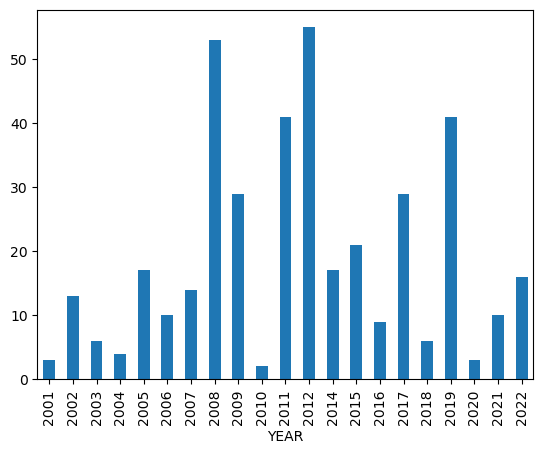

In [32]:
fire_n2.plot(x="YEAR",y="count", kind="bar")

In [33]:
fire_n3 = fire_n.groupby("month")["bright_t31"].count()

In [34]:
fire_n3

month
1      18
2      91
3     156
4      25
5       7
6       3
7      17
8      62
9      10
10      7
11      1
12      2
Name: bright_t31, dtype: int64

<Axes: xlabel='month'>

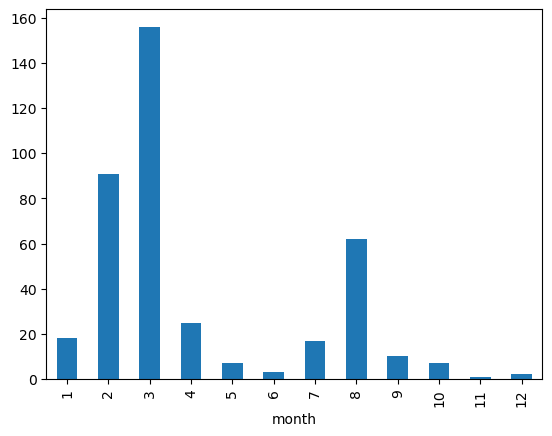

In [35]:
fire_n3.plot(x="month",y="count", kind="bar")

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8440\1081380407.py:21: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lp.Queen.from_dataframe(gdf)


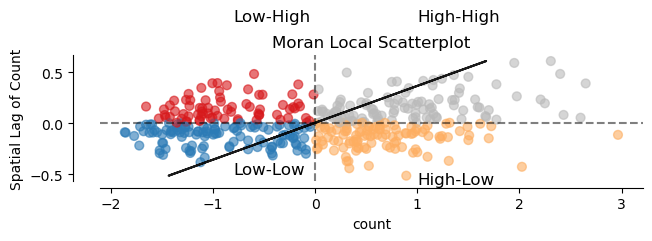

In [36]:
import pandas as pd
import numpy as np
import geopandas as gpd
import libpysal.weights as lp
import esda
import matplotlib.pyplot as plt
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local  # Import Moran_Local from esda

# Step 1: Load your data
# Assuming you have a DataFrame or a GeoDataFrame containing your data
# Replace this with your actual data loading process
data = fire_n

# Step 2: Create a GeoDataFrame if your data has spatial information
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Step 3: Create a spatial weights matrix
# Here, we'll use Queen contiguity as an example
w = lp.Queen.from_dataframe(gdf)
#w = lp.weights.DistanceBand.from_dataframe(gdf, k=5)

# Step 4: Calculate Local Moran's I
# Assuming you have a variable named 'value' representing your attribute
moran_loc = esda.moran.Moran_Local(data['bright_t31'], w)

fig, ax = moran_scatterplot(moran_loc, p=2)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of Count')
plt.text(-0.8, 1, 'Low-High', fontsize=12)
plt.text(1, -0.6, 'High-Low', fontsize=12)
plt.text(-0.8, -0.5, 'Low-Low', fontsize=12)
plt.text(1, 1, 'High-High', fontsize=12)
plt.show()

In [37]:
#y = gdf['bright_t31'].count
#w = Queen.from_dataframe(gdf)
#w.transform = 'r'

In [38]:
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran_Local

from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

import geopandas as gpd
import libpysal.weights as weights

%matplotlib inline

In [39]:

# Assuming gdf is your GeoDataFrame and 'acq_date' is the column containing datetime objects
# Specify the year you want to count values for
#desired_year = 2012

# Filter the DataFrame by the desired year
#gdf_year = gdf[gdf['YEAR'] == desired_year]

# Now calculate the count values for the specified year
#count = gdf_year['bright_t31'].values

#threshold = 100000 
# Continue with your code
#y = count
#w = Queen.from_dataframe(gdf_year)
#w = weights.distance.Kernel.from_dataframe(gdf_year)
#w = weights.distance.KNN.from_dataframe(gdf_year, k=10)
#w = weights.distance.DistanceBand.from_dataframe(gdf_year, 1.5, binary=True)
#w.transform = 'r'


In [40]:
count = data['bright_t31'].values

In [41]:
#y = gdf['count'].values
#w = Queen.from_dataframe(gdf)
#w.transform = 'r'

In [42]:
# Assuming you have latitude and longitude columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))


In [43]:
from esda.moran import Moran

y = count

#w = weights.distance.DistanceBand.from_dataframe(gdf_year, 1.5, binary=True)
w = weights.distance.KNN.from_dataframe(gdf, k=4)
#w = weights.distance.Kernel.from_dataframe(gdf_year)
#w = Queen.from_dataframe(gdf)
w.transform = 'r'

moran = Moran(y, w)
moran.I

C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


0.13319449390044327

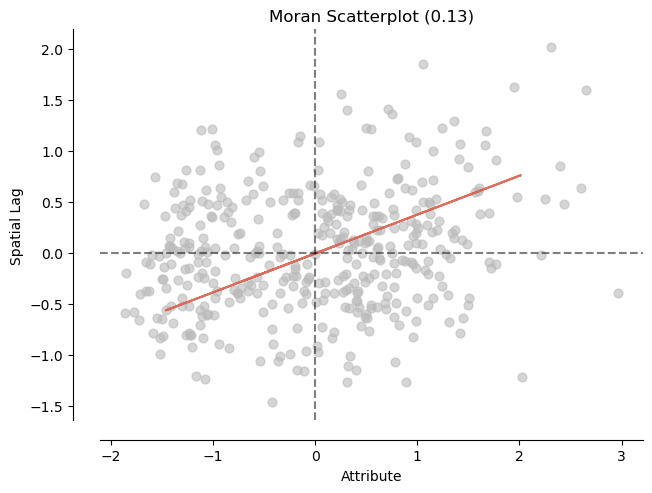

In [44]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()


C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


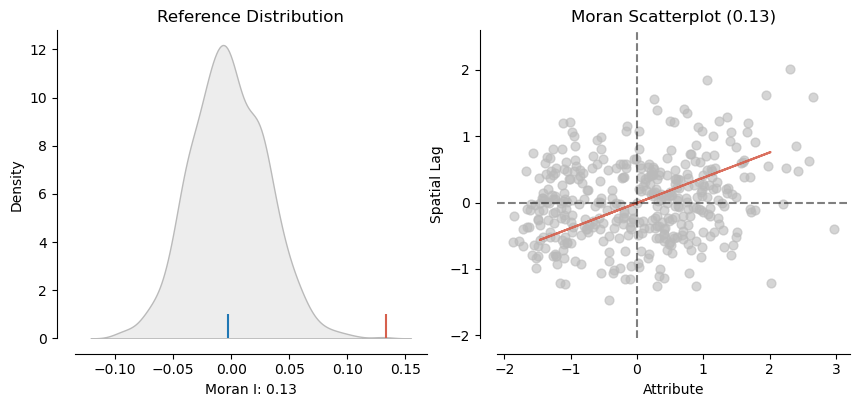

In [45]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))

#plt.title("Queen Weighting Significance")
plt.savefig("QweightMoran", dpi=300, bbox_inches='tight')
plt.savefig("KNNWeighttMoran", dpi=300, bbox_inches='tight')
plt.show()

In [46]:
moran.p_sim

0.001

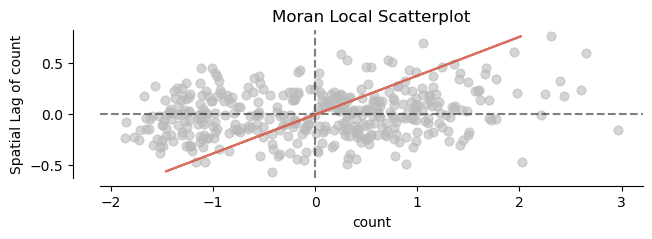

In [47]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)
fig, ax = moran_scatterplot(moran_loc)
ax.set_xlabel('count')
ax.set_ylabel('Spatial Lag of count')
plt.show()

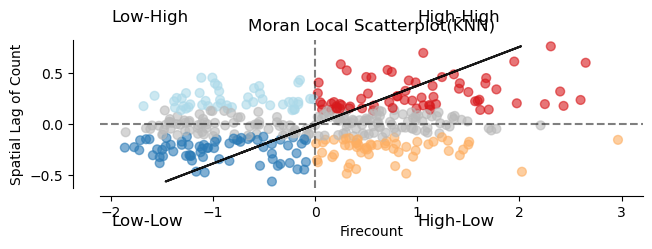

In [48]:
fig, ax = moran_scatterplot(moran_loc, p=0.25)
ax.set_xlabel('Firecount')
ax.set_ylabel('Spatial Lag of Count')
plt.text(-2, 1, 'Low-High', fontsize=12)
plt.text(1, -1, 'High-Low', fontsize=12)
plt.text(-2, -1, 'Low-Low', fontsize=12)
plt.text(1, 1, 'High-High', fontsize=12)
plt.title("Moran Local Scatterplot(KNN)")

plt.savefig("MoranPlotQueen", dpi =300, bbox_inches = 'tight')
plt.savefig("MoranPlotKNN", dpi =300, bbox_inches = 'tight')
plt.show()



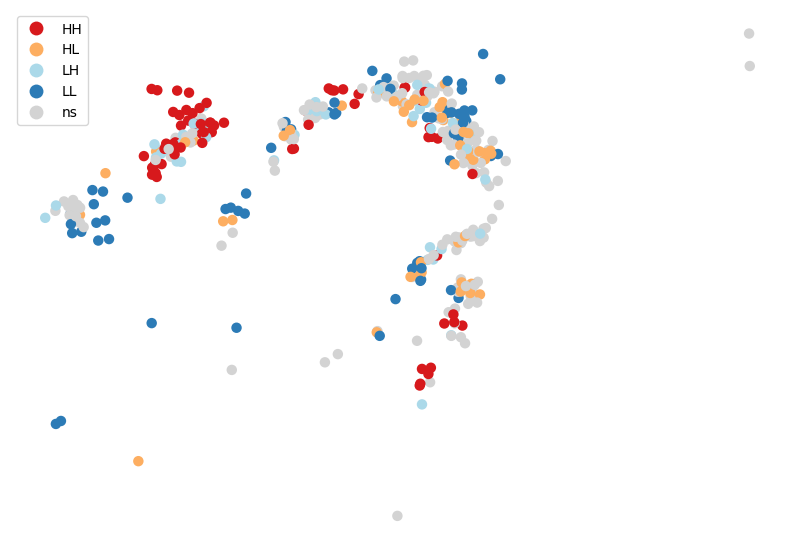

In [49]:
from splot.esda import lisa_cluster

#lisa_cluster(moran_loc, gdf_year, p=0.05, figsize = (10,10))

lisa_cluster(moran_loc, gdf, p=0.25, figsize = (10,10))

plt.show()

In [50]:
#pip install tifffile


In [51]:
import rasterio
from rasterio.plot import show

In [52]:
forest_raster = rasterio.open("MASKFOREST.tif")

In [53]:
import geopandas as gpd

mt_kenya_shape = gpd.read_file("True_forest.shp")


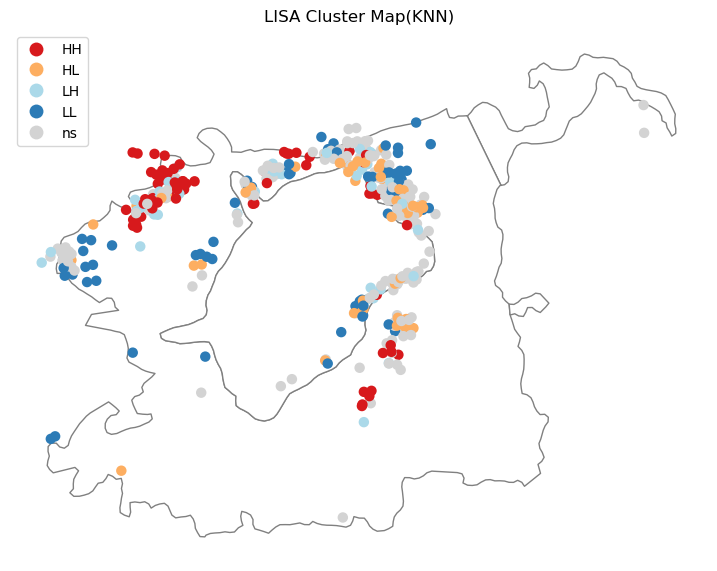

In [54]:
import geopandas as gpd

mt_kenya_shape = gpd.read_file("True_forest.shp")


# Plot the original shapefile
fig, ax = plt.subplots(figsize=(9, 9))
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='gray')

# Plot the LISA cluster map
#lisa_cluster(moran_loc, gdf_year, p=0.05, figsize=(9, 9), ax=ax)
lisa_cluster(moran_loc, gdf, p=0.25, figsize=(9, 9), ax=ax)

#plt.title('LISA Cluster Map(Queen)')
plt.title('LISA Cluster Map(KNN)')
plt.show()

# Save the plot as an image file
#plt.savefig('QueenLISA.tiff')

In [55]:
#pip install folium

In [56]:
import numpy as np
import geopandas as gpd
import folium
from scipy.interpolate import griddata

# Assuming mt_kenya_shape is your original shapefile and moran_loc is your LISA cluster map

# Extract vertices coordinates from the polygons
points = np.vstack([np.array(geom.exterior.coords.xy).T for geom in mt_kenya_shape.geometry])

# Define grid for interpolation
x = np.linspace(mt_kenya_shape.bounds.minx.min(), mt_kenya_shape.bounds.maxx.max(), 100)
y = np.linspace(mt_kenya_shape.bounds.miny.min(), mt_kenya_shape.bounds.maxy.max(), 100)
X, Y = np.meshgrid(x, y)

# Reshape grid points
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Extract values from LISA cluster map
z = moran_loc.y  # Assuming y represents the LISA cluster values

# Interpolate using Inverse Distance Weighting (IDW)
z_interp = griddata(points, z, xy, method='linear')

# Reshape interpolated values to match the grid
Z = z_interp.reshape(X.shape)

# Create a Folium map centered at the centroid of the shapefile
m = folium.Map(location=[mt_kenya_shape.centroid.y, mt_kenya_shape.centroid.x], zoom_start=10)

# Create a heatmap layer from the interpolated values
heatmap_layer = folium.raster_layers.HeatMap(
    data=xy.tolist(),  # Convert Numpy array to list of coordinates
    radius=10,
    blur=5,
    min_opacity=0.5,
    gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'},
    overlay=True,
)

# Add heatmap layer to the map
m.add_child(heatmap_layer)

# Display the map
m


ValueError: different number of values and points

In [57]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from libpysal.weights import Queen

# Assuming gdf is your original GeoDataFrame and moran_loc is your LISA cluster map

# Filter the DataFrame by the desired year
gdf_year = gdf[gdf['YEAR'] == desired_year]

# Now calculate the count values for the specified year
count = gdf_year['bright_t31'].values

# Compute Queen contiguity spatial weights
w = Queen.from_dataframe(gdf_year)

w.transform = 'r'

# Get the centroids of the polygons
points = np.array([[point.x, point.y] for point in gdf_year.geometry.centroid])

# Define grid for interpolation
x = np.linspace(gdf_year.bounds.minx.min(), gdf_year.bounds.maxx.max(), 100)
y = np.linspace(gdf_year.bounds.miny.min(), gdf_year.bounds.maxy.max(), 100)
X, Y = np.meshgrid(x, y)

# Reshape grid points
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Interpolate using Inverse Distance Weighting (IDW)
z_interp = griddata(points, count, xy, method='linear')

# Reshape interpolated values to match the grid
Z = z_interp.reshape(X.shape)

# Plot the original shapefile
fig, ax = plt.subplots(figsize=(9, 9))
gdf_year.plot(ax=ax, color='white', edgecolor='black')

# Plot the interpolated surface
im = ax.imshow(Z, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')
plt.colorbar(im, ax=ax, label='LISA Cluster Value')

plt.title(f'Interpolated LISA Cluster Map for Year {desired_year}')
plt.show()


NameError: name 'desired_year' is not defined

In [58]:
import geopandas as gpd

mt_kenya_shape = gpd.read_file("True_forest.shp")

In [59]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from libpysal.weights import Queen

# Assuming gdf is your original GeoDataFrame, moran_loc is your LISA cluster map, and desired_year is the desired year
data = fire_n
# Filter the DataFrame by the desired year
#gdf_year = gdf[gdf['YEAR'] == desired_year]

# Now calculate the count values for the specified year
#count = gdf_year['bright_t31'].values
count = data['bright_t31'].values

# Compute Queen contiguity spatial weights
w = Queen.from_dataframe(mt_kenya_shape)

# Get the centroids of the polygons
points = np.array([[point.x, point.y] for point in mt_kenya_shape.geometry.centroid])

# Define grid for interpolation
x = np.linspace(mt_kenya_shape.bounds.minx.min(), mt_kenya_shape.bounds.maxx.max(), 100)
y = np.linspace(mt_kenya_shape.bounds.miny.min(), mt_kenya_shape.bounds.maxy.max(), 100)
X, Y = np.meshgrid(x, y)

# Reshape grid points
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Interpolate using Inverse Distance Weighting (IDW)
z_interp = griddata(points, count, xy, method='linear')

# Reshape interpolated values to match the grid
Z = z_interp.reshape(X.shape)

# Plot the interpolated surface with the original shapefile outline
fig, ax = plt.subplots(figsize=(9, 9))
mt_kenya_shape.plot(ax=ax, color='white', edgecolor='black')  # Plot the shapefile outline 
im = ax.imshow(Z, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')
plt.colorbar(im, ax=ax, label='LISA Cluster Value')

plt.title(f'Interpolated LISA Cluster Map for Year {desired_year} with Shapefile Outline')
plt.show()


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8440\396336144.py:17: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(mt_kenya_shape)
C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8440\396336144.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points = np.array([[point.x, point.y] for point in mt_kenya_shape.geometry.centroid])


ValueError: different number of values and points

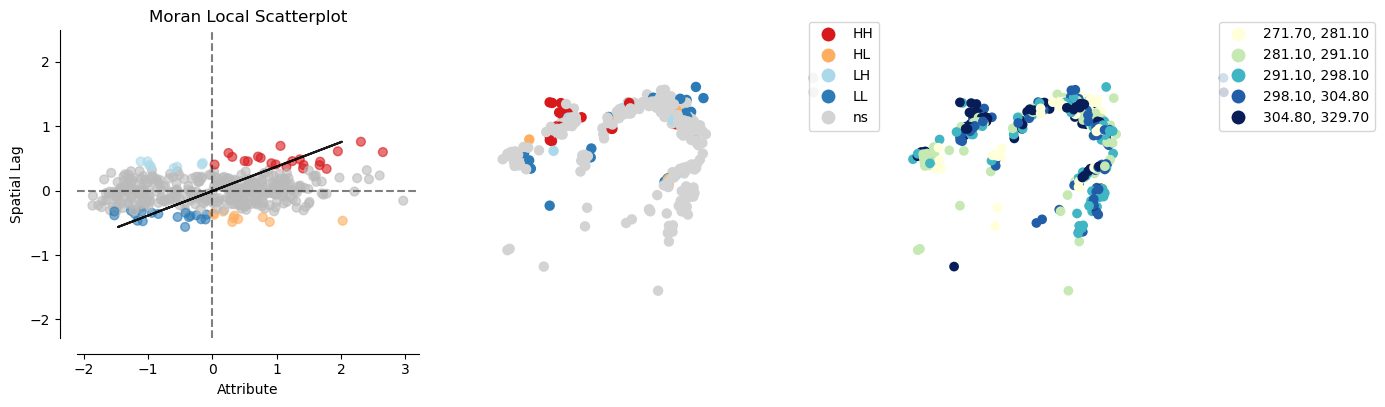

In [60]:
# Plot the original shapefile
#fig, ax = plt.subplots(figsize=(9, 9))
#mt_kenya_shape.plot(ax=ax, color='white', edgecolor='black')


from splot.esda import plot_local_autocorrelation


#plot_local_autocorrelation(moran_loc, gdf_year, count)
plot_local_autocorrelation(moran_loc, gdf, count)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


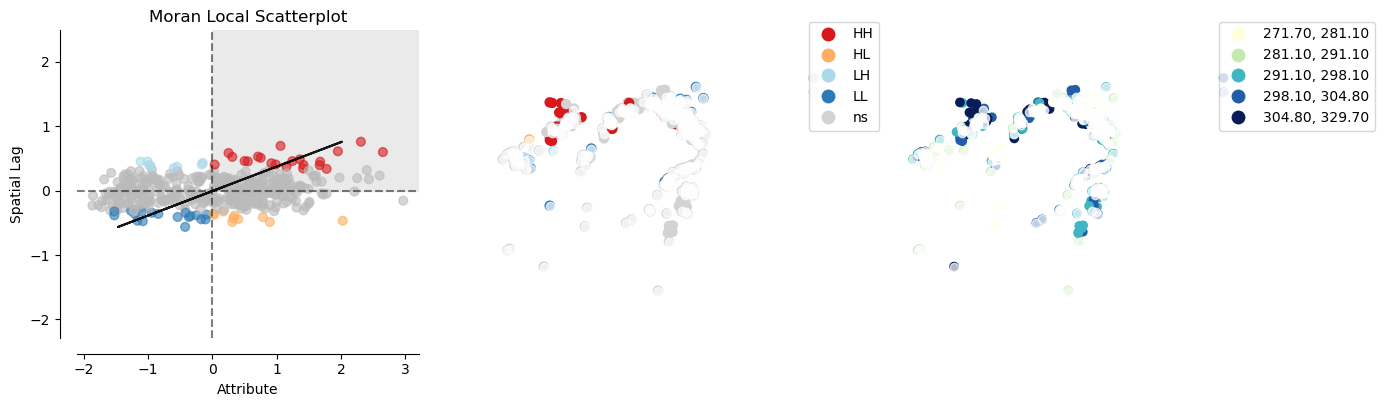

In [61]:
#plot_local_autocorrelation(moran_loc, gdf_year, count, quadrant=1)
plot_local_autocorrelation(moran_loc, gdf, count, quadrant=1)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


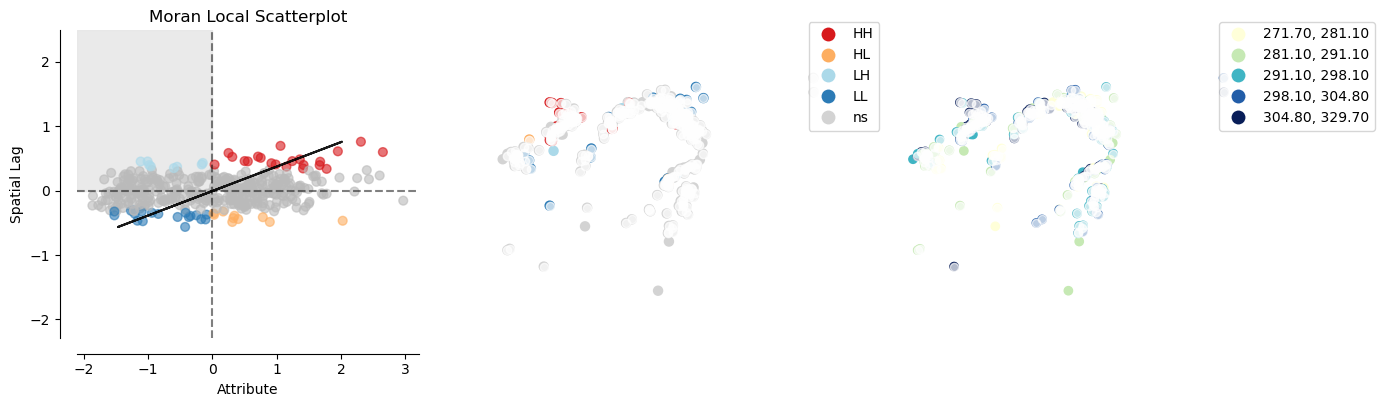

In [62]:
#plot_local_autocorrelation(moran_loc, gdf_year, count, quadrant=2)
plot_local_autocorrelation(moran_loc, gdf, count, quadrant=2)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


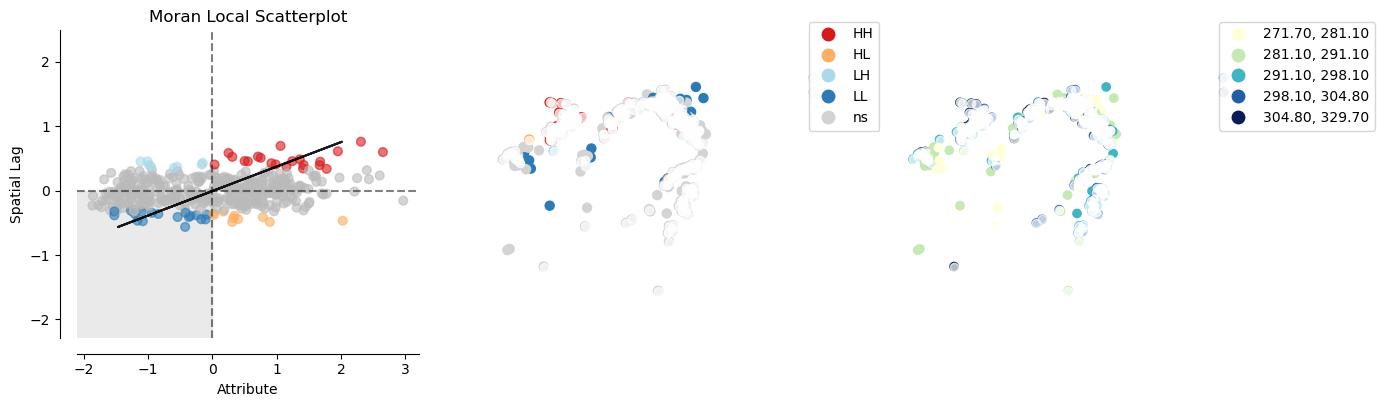

In [63]:
#plot_local_autocorrelation(moran_loc, gdf_year, count, quadrant=3)
plot_local_autocorrelation(moran_loc, gdf, count, quadrant=3)
plt.show()

C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1094: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[1], color='#E5E5E5')
C:\Users\DANIEL\anaconda3\Lib\site-packages\splot\_viz_esda_mpl.py:1101: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  gpd.GeoSeries([union2]).plot(linewidth=1, ax=axs[2], color='#E5E5E5')


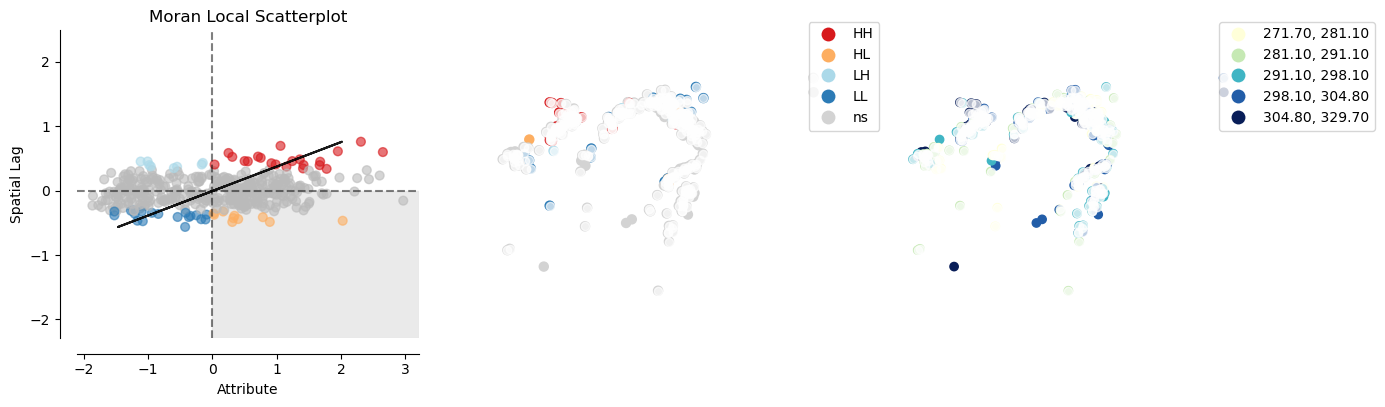

In [64]:
#plot_local_autocorrelation(moran_loc, gdf_year, count, quadrant=4)
plot_local_autocorrelation(moran_loc, gdf, count, quadrant=4)
plt.show()

In [65]:
from libpysal.weights.contiguity import Queen
from libpysal import examples
from esda.moran import Moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

import geopandas as gpd
import libpysal.weights as weights

In [66]:
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import figure, scatter, show

In [67]:
mx = gpd.read_file("True_forest.shp")


In [68]:
mx_queen = weights.contiguity.Queen.from_dataframe(mx)


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8440\3347089397.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  mx_queen = weights.contiguity.Queen.from_dataframe(mx)


AttributeError: 'GeoDataFrame' object has no attribute 'array'

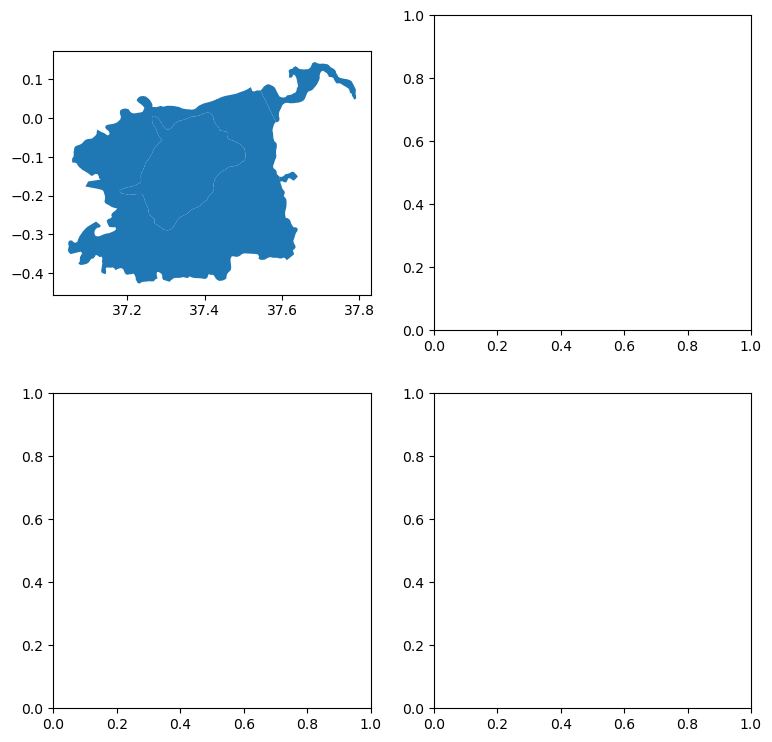

In [69]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0,0]
mx.plot(ax=ax)

# Get the centroids of the polygons
points = mx.array([[point.x, point.y] for point in gdf.geometry.centroid])

ax.set_title("Queen")

mx_queen.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()

C:\Users\DANIEL\AppData\Local\Temp\ipykernel_8440\899344635.py:19: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)


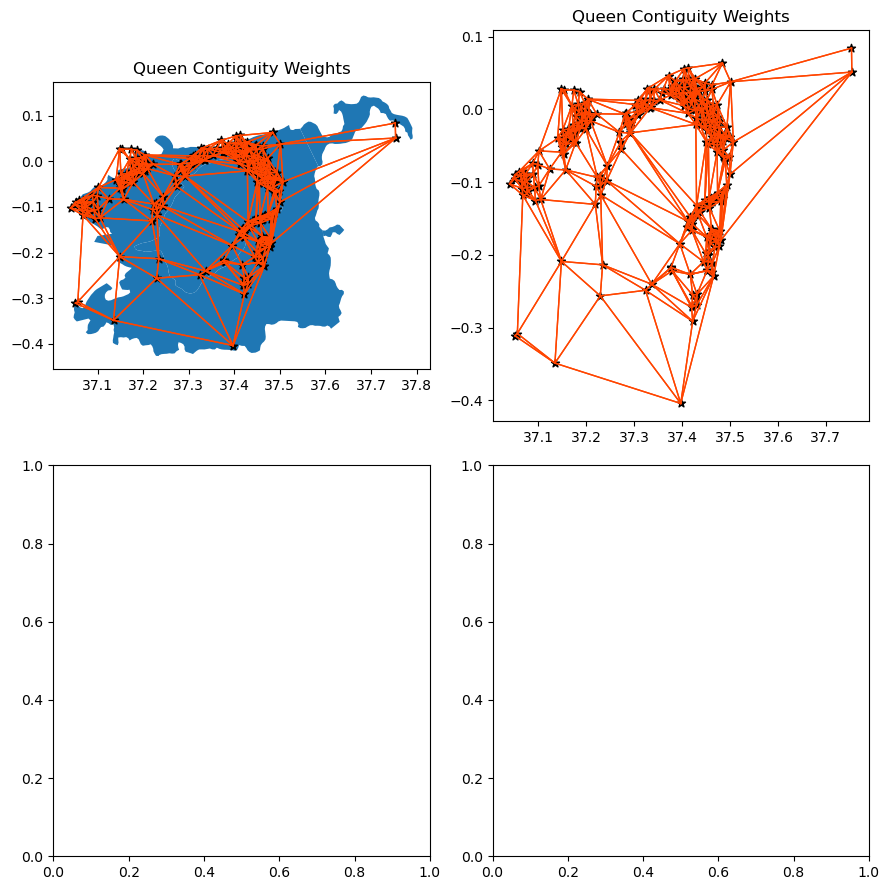

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen

# Assuming mx is your original shapefile

# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Plot the original shapefile
ax = axs[0, 0]
mx.plot(ax=ax)
ax.set_title("Original Shapefile")

# Filter the DataFrame by the desired year
#gdf_year = gdf[gdf['YEAR'] == desired_year]

# Compute Queen contiguity spatial weights
w = Queen.from_dataframe(gdf)

# Plot the contiguity weights
ax = axs[0,0]
w.plot(gdf,edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"), ax=ax)
ax.set_title("Queen Contiguity Weights")

# Plot the contiguity weights
ax = axs[0,1]
w.plot(gdf, edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax)
ax.set_title("Queen Contiguity Weights")


plt.tight_layout()

plt.savefig("QueenVisualize", dpi=300, bbox_inches = 'tight')
plt.show()


In [71]:
mx_knn4 = weights.KNN.from_dataframe(gdf, k=3)

C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 6 disconnected components.
  warnings.warn(message)


C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


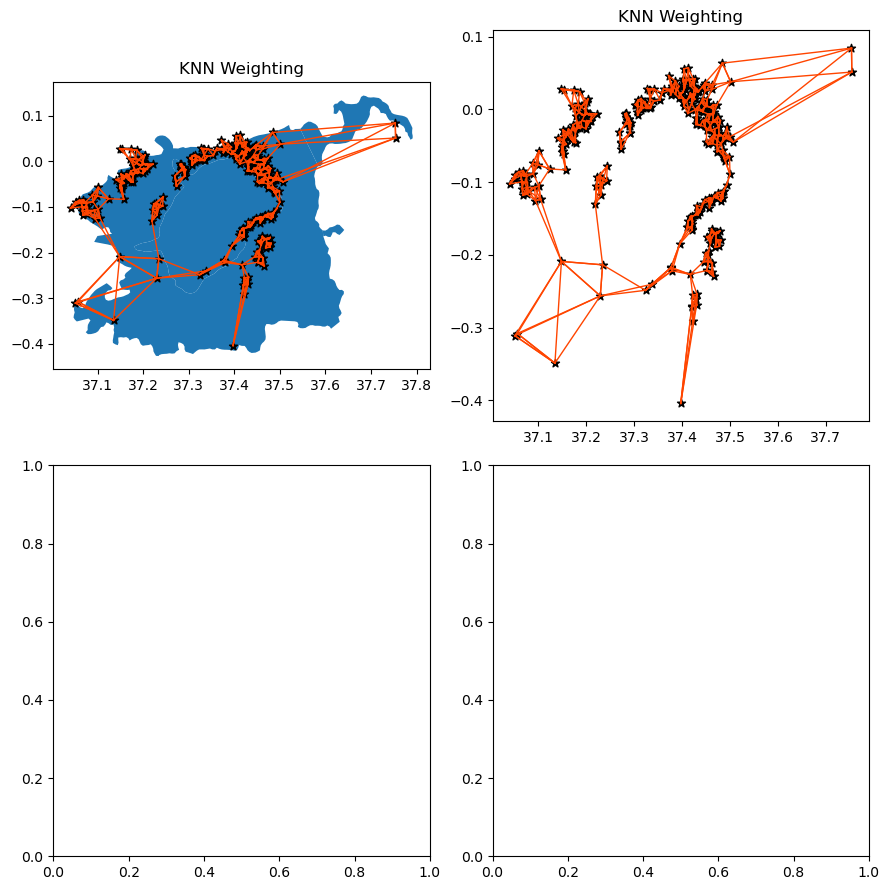

In [72]:
# Assuming mx is your original shapefile

# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Plot the original shapefile
ax = axs[0, 0]
mx.plot(ax=ax)
ax.set_title("Original Shapefile")

# Filter the DataFrame by the desired year
#gdf_year = gdf[gdf['YEAR'] == desired_year]

# Compute Queen contiguity spatial weights
y = weights.KNN.from_dataframe(gdf,k=4)

# Plot the contiguity weights
ax = axs[0,0]
y.plot(gdf, edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax)
ax.set_title("KNN Weighting")

# Plot the contiguity weights
ax = axs[0,1]
y.plot(gdf,  edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax)
ax.set_title("KNN Weighting")


plt.tight_layout()
plt.show()


C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 30 disconnected components.
  warnings.warn(message)


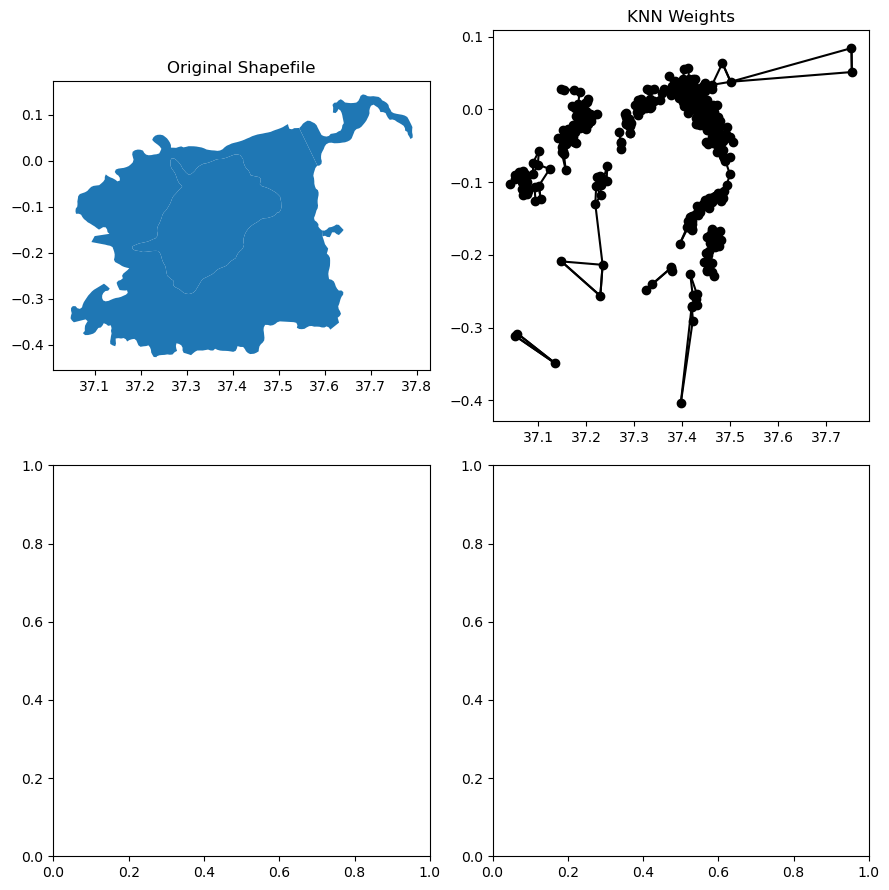

In [73]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))



# Plot the original shapefile
ax = axs[0, 0]
mx.plot(ax=ax)
ax.set_title("Original Shapefile")

# Filter the DataFrame by the desired year
#gdf_year = gdf[gdf['YEAR'] == desired_year]

# Compute Queen contiguity spatial weights
y = weights.KNN.from_dataframe(gdf)

# Plot the contiguity weights
ax = axs[0, 1]
y.plot(gdf, ax=ax)
ax.set_title("KNN Weights")


plt.tight_layout()
plt.show()






# KNN
#ax = axs[0, 1]
#mx.plot(ax=ax)
#mx_knn4.plot(
    #mx,
    #edge_kws=dict(linewidth=1, color="orangered"),
    #node_kws=dict(marker="*"),
    #ax=ax,
#)
#ax.set_axis_off()
#ax.set_title("$K$-NN 4")

In [74]:
import geopandas as gpd

# Read the shapefile
shapefile_path = "True_forest.shp"
gdf = gpd.read_file(shapefile_path)

# Check the CRS of the GeoDataFrame
print("CRS of the shapefile:")
print(gdf.crs)

CRS of the shapefile:
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWar

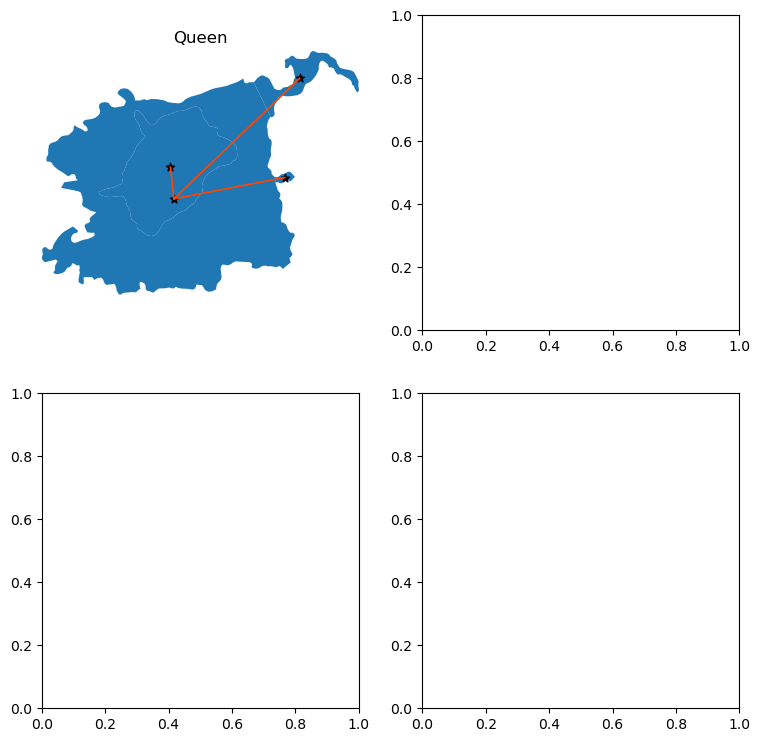

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile
shapefile_path = "True_forest.shp"
mx = gpd.read_file(shapefile_path)

# Get the bounding box of the shapefile
xmin, ymin, xmax, ymax = mx.total_bounds

# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))

# Contiguity
ax = axs[0, 0]
gdf.plot(ax=ax)

ax.set_title("Queen")

mx_queen.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()

# Adjust plot limits to encompass the entire area
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()


In [76]:
mx_knn4 = weights.KNN.from_dataframe(mx, k=2)


C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWar

Text(0.5, 1.0, '$K$-NN 4')

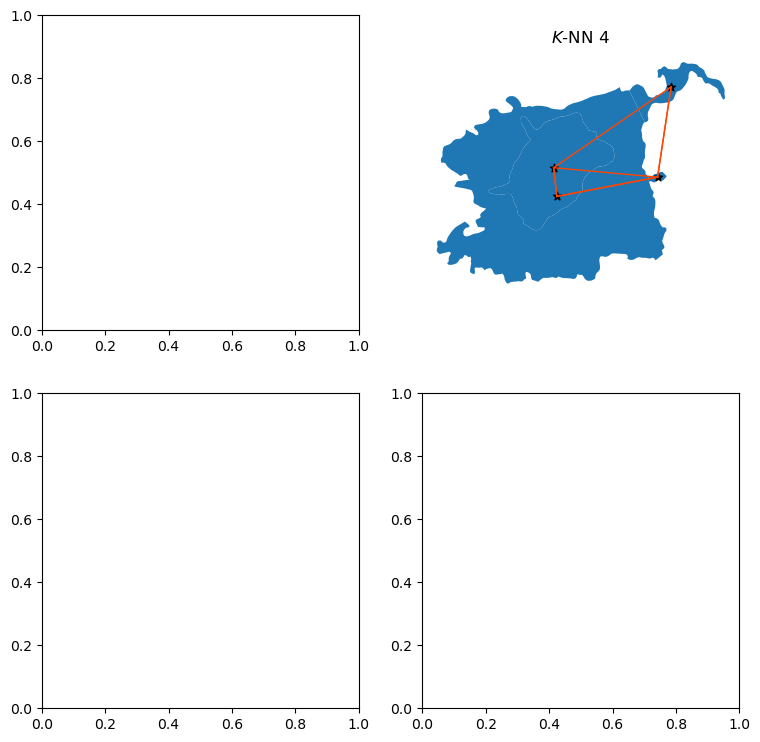

In [77]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))


# KNN
ax = axs[0, 1]
mx.plot(ax=ax)
mx_knn4.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("$K$-NN 4")

In [78]:
mx_union = weights.set_operations.w_union(mx_knn4, mx_queen)

C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = gdf.loc[neighbors].centroid
C:\Users\DANIEL\anaconda3\Lib\site-packages\libpysal\weights\weights.py:1495: UserWar

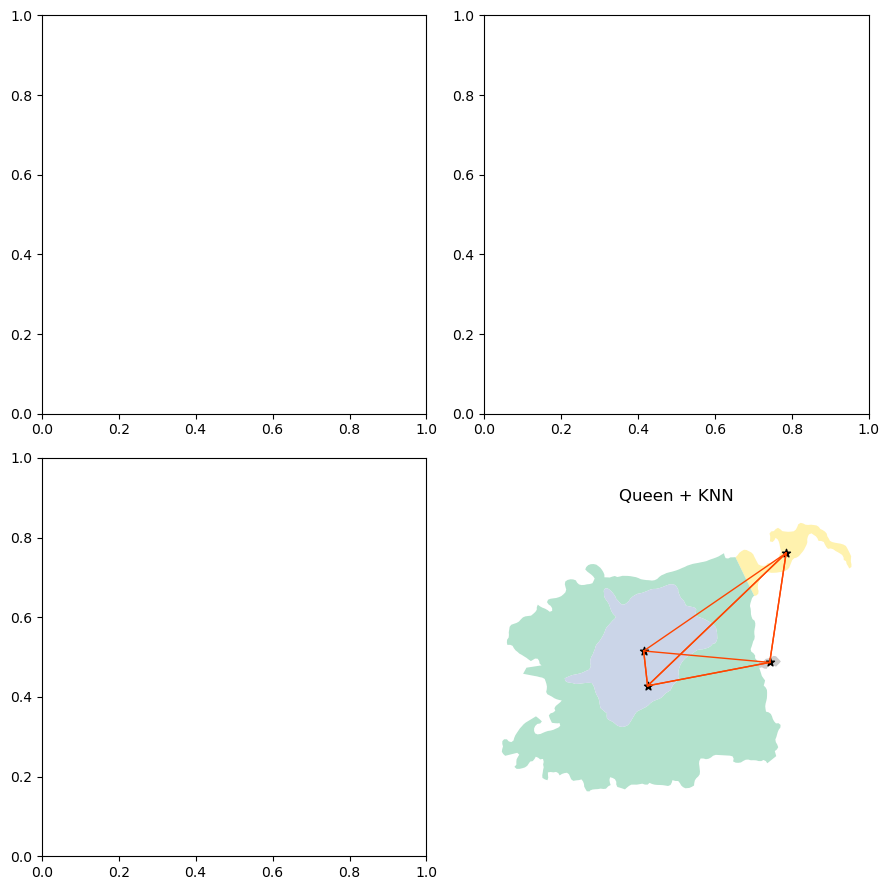

In [79]:
# Set up figure and axis
f, axs = plt.subplots(2, 2, figsize=(9, 9))
 
    
# Union
ax = axs[1, 1]
mx.plot(column="geometry", categorical=True, cmap="Pastel2", ax=ax)
mx_union.plot(
    mx,
    edge_kws=dict(linewidth=1, color="orangered"),
    node_kws=dict(marker="*"),
    ax=ax,
)
ax.set_axis_off()
ax.set_title("Queen + KNN")
f.tight_layout()
plt.show()

In [18]:
import pandas as pd
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
#fire_data = fire_n

fire_data = pd.read_csv("Fire_n2.csv")
weather_data = ("RELATIVE HUMIDITY.csv.csv")

In [20]:
# Load raster data
slope_raster = rasterio.open("Slope_Forest_PErcent1.tif")
aspect_raster = rasterio.open("Aspect_Forest.tif")

In [21]:
# Load raster data
slope_raster = rasterio.open("Slope_ForestDegree.tif")
aspect_raster = rasterio.open("Aspect_Forest.tif")

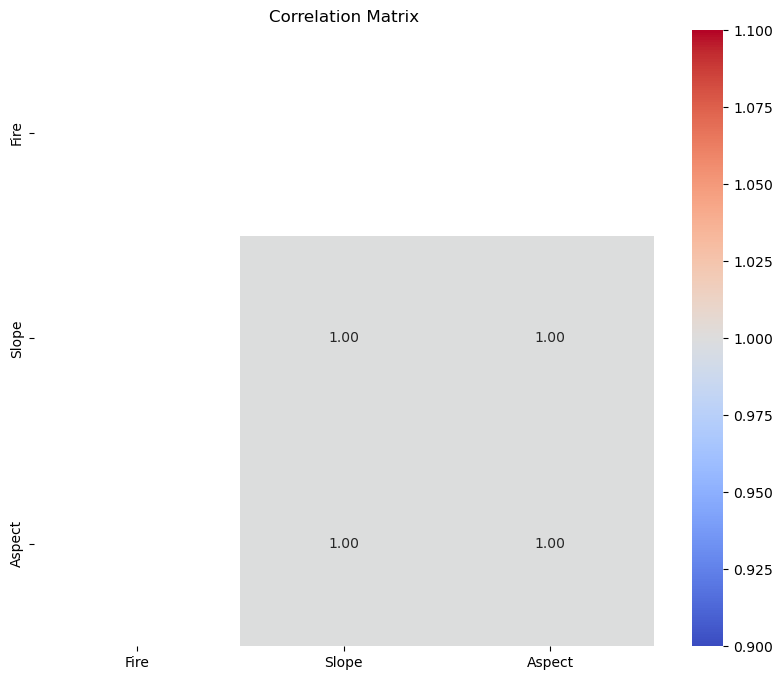

C:\Users\DANIEL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


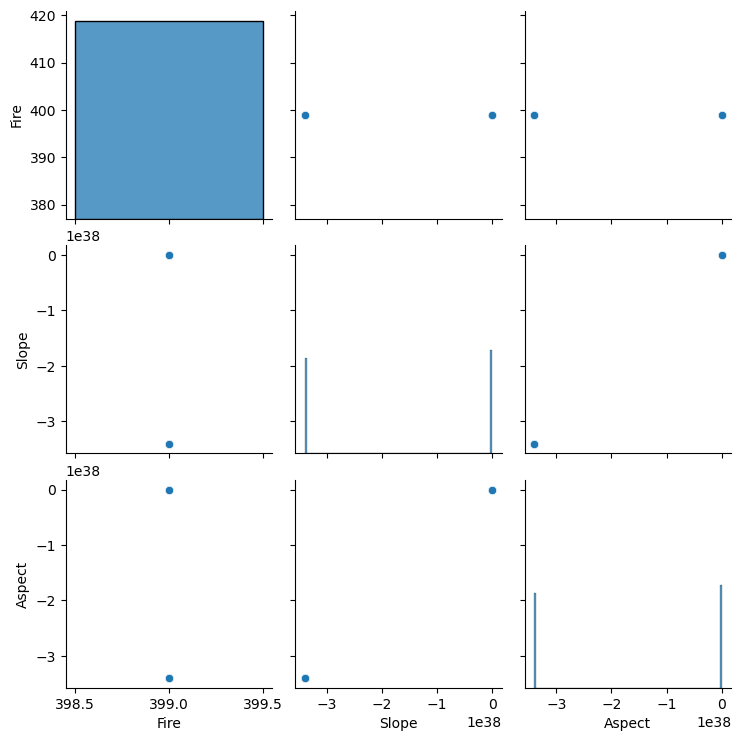

In [22]:
# Step 3: Calculate Correlation
# Combine raster data into numpy arrays
slope_array = slope_raster.read(1)
aspect_array = aspect_raster.read(1)
#settlement_array = settlement_raster.read(1)
#population_array = population_raster.read(1)

# Calculate correlation
correlation_df = pd.DataFrame({
    'Fire': fire_n['bright_t31'].count(),
    'Slope': slope_array.flatten(),
    'Aspect': aspect_array.flatten(),
    #'Settlement': settlement_array.flatten(),
    #'Weather': weather_data['ANN']  # Assuming you have a column with weather data
})

correlation_matrix = correlation_df.corr()

# Step 4: Visualize Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
sns.pairplot(correlation_df, kind="scatter")
plt.show()